In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt


%matplotlib inline
from datetime import datetime
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score , cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV


In [35]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()


In [3]:
df.shape

(8147, 13)

In [36]:
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]
# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)
print(offset)
# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]
print(X_train.shape)
# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]
print(X_test.shape)

7332
(7332, 16)
(815, 16)


In [43]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

score_train = round(clf.score(X_train, y_train),2)
score_test = round(clf.score(X_test, y_test),2)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = round(table_train.loc[0.0,1.0] / table_train.loc['All','All'],2)
train_tII_errors = round(table_train.loc[1.0,0.0] / table_train.loc['All','All'],2)

test_tI_errors = round(table_test.loc[0.0,1.0]/table_test.loc['All','All'],2)
test_tII_errors = round(table_test.loc[1.0,0.0]/table_test.loc['All','All'],2)

print((
    'Training set accuracy:\n'
    'R-squared Score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
     'R-squared Score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(score_train,train_tI_errors, train_tII_errors,score_test, test_tI_errors, test_tII_errors))


Training set accuracy:
R-squared Score: 0.78
Percent Type I errors: 0.05
Percent Type II errors: 0.18

Test set accuracy:
R-squared Score: 0.75
Percent Type I errors: 0.06
Percent Type II errors: 0.19


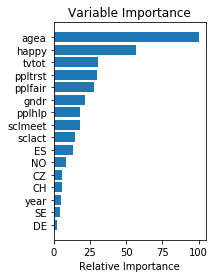

In [38]:
feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# DRILL: Improve this gradient boost model

In [44]:
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]
# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)


In [45]:
X.head()

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,CH,CZ,DE,ES,NO,SE
0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1,0,0,0,0,0
1,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1,0,0,0,0,0
2,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,1,0,0,0,0,0
3,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1,0,0,0,0,0
4,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1,0,0,0,0,0


In [46]:
# Create training and test sets.
offset = int(X.shape[0] * 0.9)
print(offset)
# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]
print(X_train.shape)
# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]
print(X_test.shape)

7332
(7332, 16)
(815, 16)


In [33]:
params = {'n_estimators': [500,1000],
          'max_depth': [2,4],
          'loss': ['deviance','exponential'],
         'learning_rate': [0.05, 0.1, 0.5],
          'subsample':[0.5, 0.8]}
start_time = datetime.now() 
gsearch1 = GridSearchCV(
    estimator = ensemble.GradientBoostingClassifier(), 
    param_grid = params)
gsearch1.fit(X_train, y_train)

print('\nBest parameters {} '.format(gsearch1.best_params_))
print("\nDuration : ", (datetime.now() - start_time))


Best parameters {'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 2, 'n_estimators': 500, 'subsample': 0.5} 

Duration :  0:06:57.200378


In [47]:

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**gsearch1.best_params_)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

score_train = round(clf.score(X_train, y_train),2)
score_test = round(clf.score(X_test, y_test),2)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = round(table_train.loc[0.0,1.0] / table_train.loc['All','All'],2)
train_tII_errors = round(table_train.loc[1.0,0.0] / table_train.loc['All','All'],2)

test_tI_errors = round(table_test.loc[0.0,1.0]/table_test.loc['All','All'],2)
test_tII_errors = round(table_test.loc[1.0,0.0]/table_test.loc['All','All'],2)

print((
    'Training set accuracy:\n'
    'R-squared Score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
     'R-squared Score: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(score_train,train_tI_errors, train_tII_errors,score_test, test_tI_errors, test_tII_errors))


Training set accuracy:
R-squared Score: 0.77
Percent Type I errors: 0.05
Percent Type II errors: 0.18

Test set accuracy:
R-squared Score: 0.75
Percent Type I errors: 0.06
Percent Type II errors: 0.19


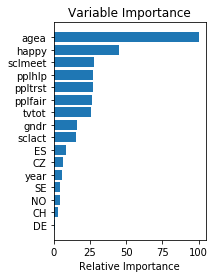

In [48]:
feature_importance2 = clf.feature_importances_

# Make importances relative to max importance.
feature_importance2 = 100.0 * (feature_importance2 / feature_importance2.max())
sorted_idx2 = np.argsort(feature_importance2)
pos2 = np.arange(sorted_idx2.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos2, feature_importance2[sorted_idx2], align='center')
plt.yticks(pos2, X.columns[sorted_idx2])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

According to the best model, again, age and happiness are the two greatest indicators of a person's relationship status. This model has been optimized for the data set and is a good predictor of a person's relationship status.